<a href="https://colab.research.google.com/github/hungcuongthan/ML-DL-Projects/blob/main/ANN/2_hidden_layers_ANN_(by_hand).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Our ANN:

1 input layer, 2 hidden layers, 1 output layers

---

1st layer (intput layer) has dimension of 3 (3 features for each training example.)

2nd layer has 3 nodes.

3rd layer has 4 nodes.

4th layer (output layer) has 3 nodes, for multiclasses classification problem.



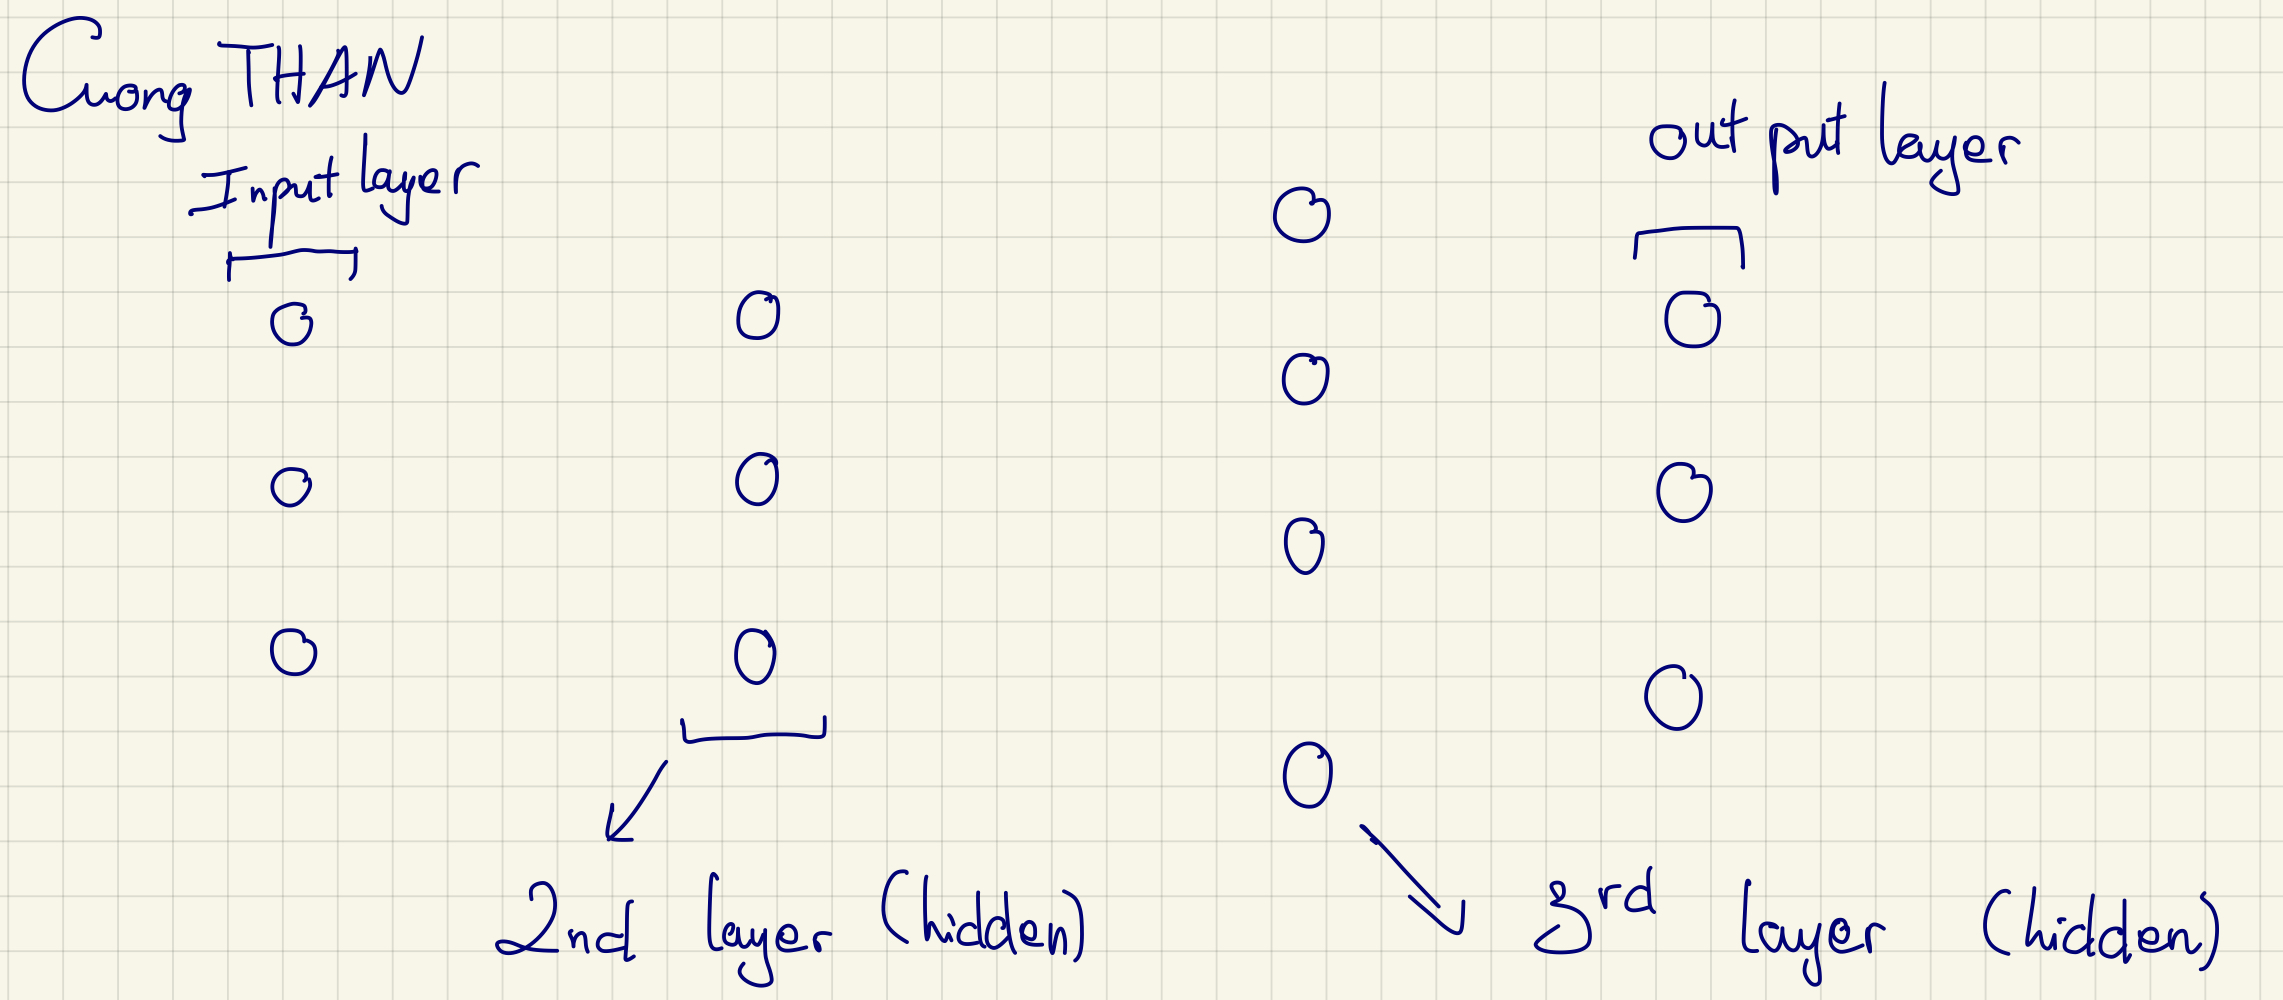

We will use softmax activation function for output layer and categorical cross-entropy for computing loss.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid_f(x):
  return 1 / (1 + np.exp(-x)) #This will return value between 0 and 1.

def relu_f(x):
  return np.maximum(0, x) #This will return the bigger value between 0 and x.

# def softmax_f(x):
#   exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
#   probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
#   return probabilities

Why not to use sigmoid function?

In [ ]:
t1 = np.array([1.5,-0.5,7])

sigmoid_f(t1)
relu_f(t1)

array([1.5, 0. , 7. ])

# 1. Batch size = 1 (One training example at a time)

In [ ]:
#initialize randomly weights, biases and input values.


np.random.seed(1)

X = np.array([1.0, 2.0, 3.0, 2.5])


w2 = 2*np.random.random((3,4)).T - 1 # 3 for 3 nodes in 2nd layer, and 4 for 4 input values (features).
b2 = np.random.random((1,3)) #2 bias terms for 2 nodes in 2nd layer


w3 = 2*np.random.random((4,3)).T - 1 # 4 nodes in 3rd layer
b3 = np.random.random((1,4))

w4 = 2*np.random.random((3,4)).T - 1
b4 = np.random.random((1,3))

In [ ]:
#initialize a1
a1 = X

z2 = np.dot(a1,w2) + b2 # z2 will have the dimension of 1x3, 1 for 1 training example at a time, 3 for 3 nodes of 2nd layer.

z2

array([[-3.06785666, -4.1136515 ,  0.41745407]])

In [ ]:
#From z2, we compute a2 using relu activation function
a2 = relu_f(z2)
a2

array([[0.        , 0.        , 0.41745407]])

In [ ]:
#From a2, we compute z3

z3 = np.dot(a2,w3) + b3 # z3 will have the dimension of 1x4

z3

array([[ 0.0880554 ,  0.42092451,  1.03871422, -0.24810313]])

In [ ]:
#From z3, we compute a3
a3 = relu_f(z3)

a3

array([[0.0880554 , 0.42092451, 1.03871422, 0.        ]])

In [ ]:
#From a3, we compute z4

z4 = np.dot(a3,w4) + b4 # z4 will have the dimension of 1x3 for 3 output values.

z4

array([[1.22975788, 0.92290283, 1.41904025]])

In [ ]:
#From z4, we compute output values using softmax function

a4 = sigmoid_f(z4)

output_values = a4

output_values

array([[0.7737762 , 0.71563321, 0.80518791]])

## BackPropagation

In this backpropagation process, we will start by defining the cost function. I will use cost function = (y-y_hat)**2

In [ ]:
#Let's say we have the actual label as follow:

y = np.array([1,0,0]) #label 0th is the correct label


We can define the cost function as follow:

In [ ]:
def cost_f(x,y):
  return (x-y)**2

In [ ]:
cost_f(output_values,y)

array([[0.05117721, 0.51213089, 0.64832758]])

From the definition of the cost function, we have the derivative of the cost function as follow:

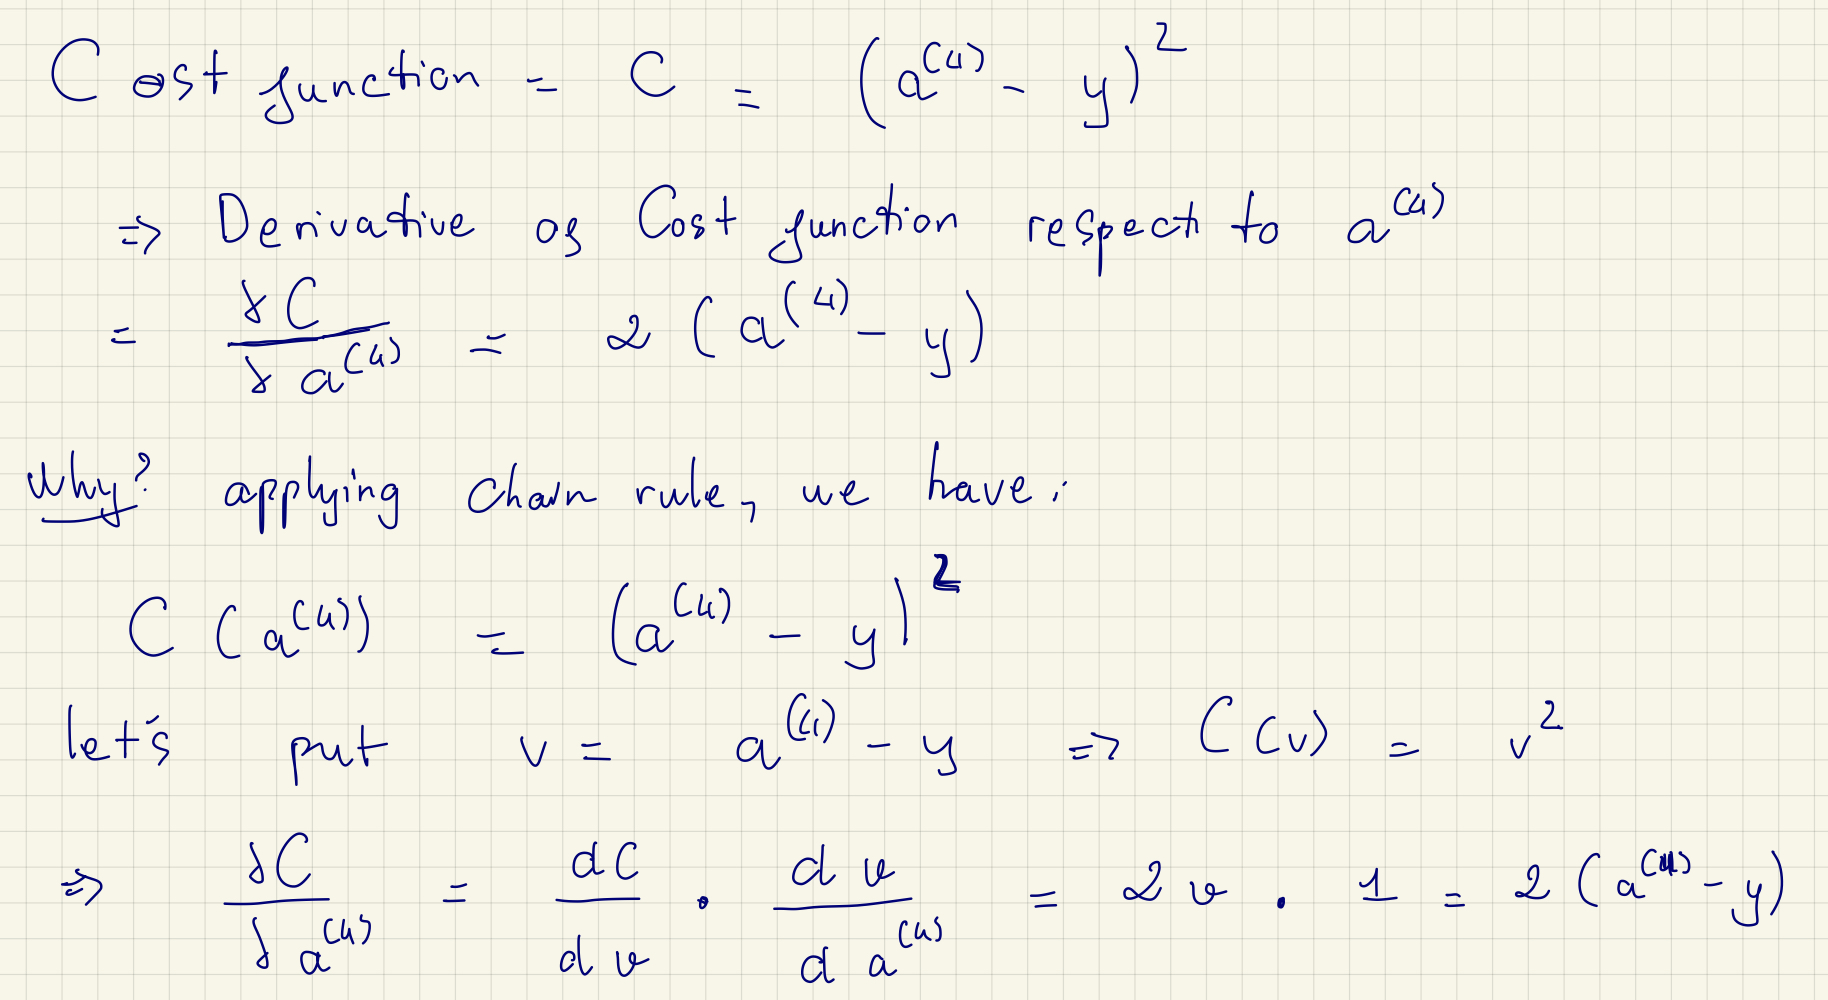

Derivative of ReLU activation function: f(x)=max(0,x). It means if x<=0 then f(x)=0, else f(x)=x. 

In the first case, when x < 0 so the derivative of f(x) with respect to x gives result f'(x)=0. 

In the second case, it's clear to compute f'(x)=1

So we have: except the output layer:

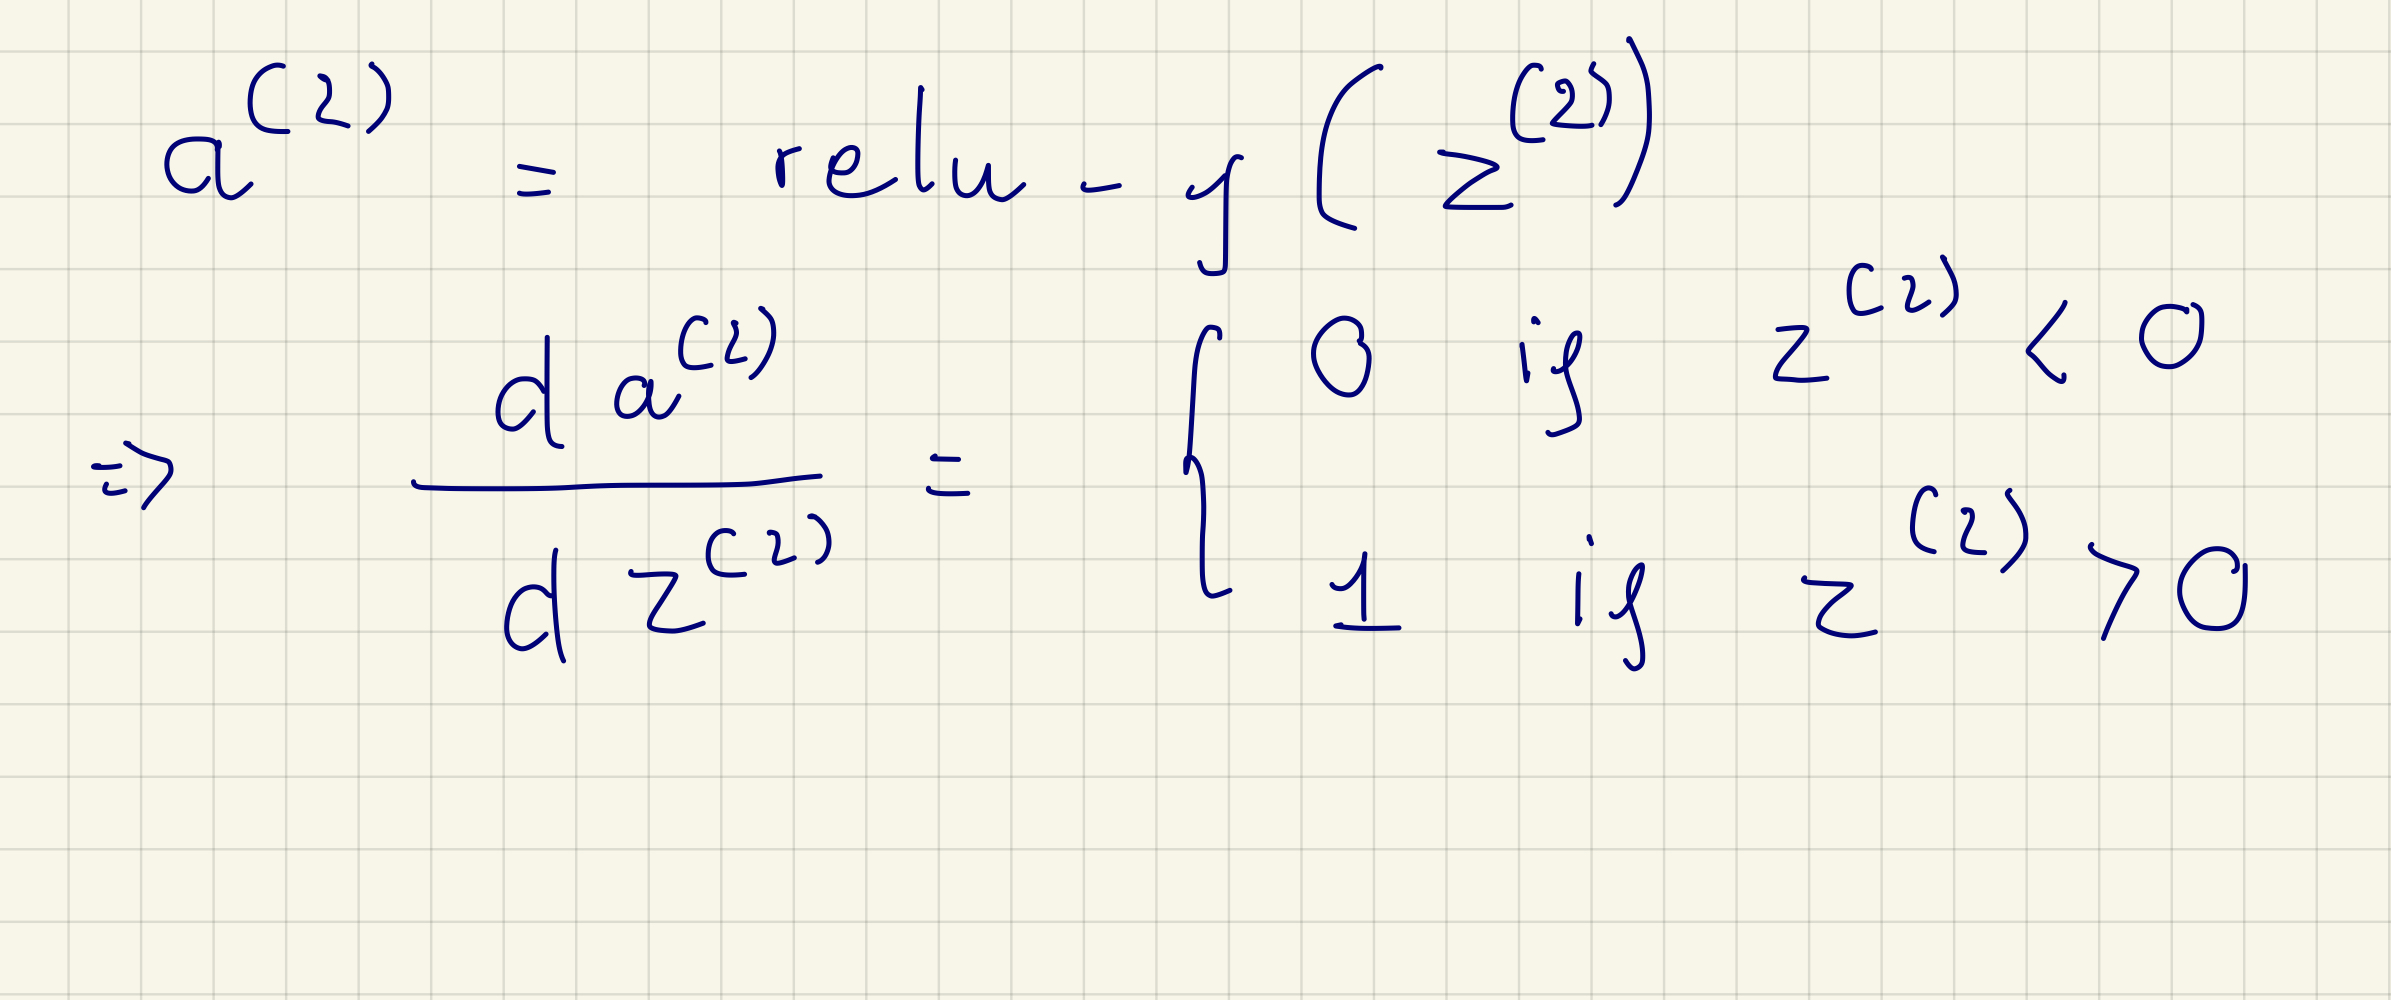

In [ ]:
#Derivative of relu activation function
d_relu_f = lambda z : (z > 0).astype(int)

For sigmoid activation function, we have its derivative as follow:

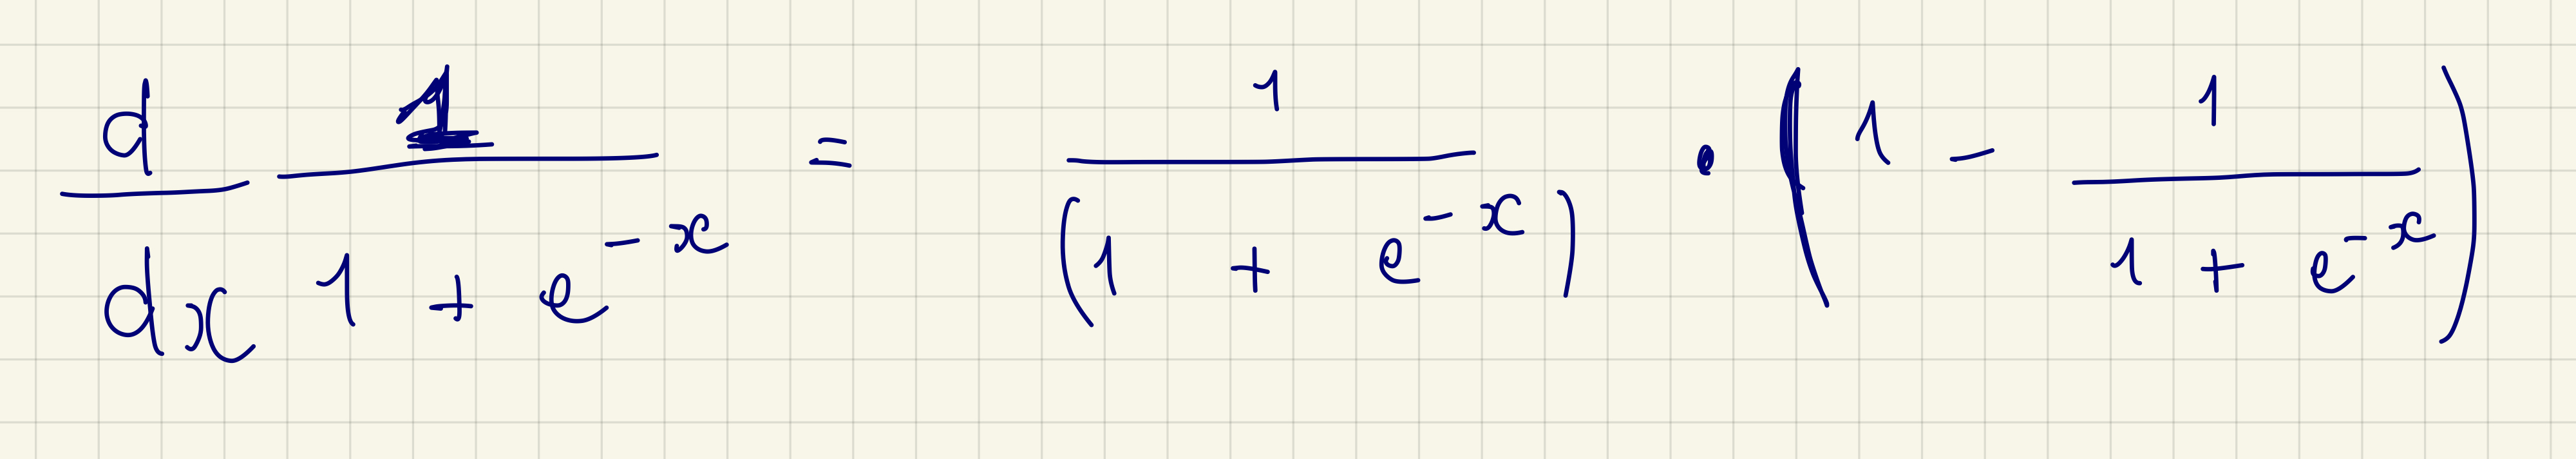

In [ ]:
#define derivative of sigmoid function
d_sigmoid_f = lambda z : (1/(1+np.exp(-z)))*(1 - (1/(1+np.exp(-z))))

Now we have gathered all the formulas needed for backpropagation:

We will begin to compute Jacobian matrix of w4, which is the partial derivative of Cost with respect to w4

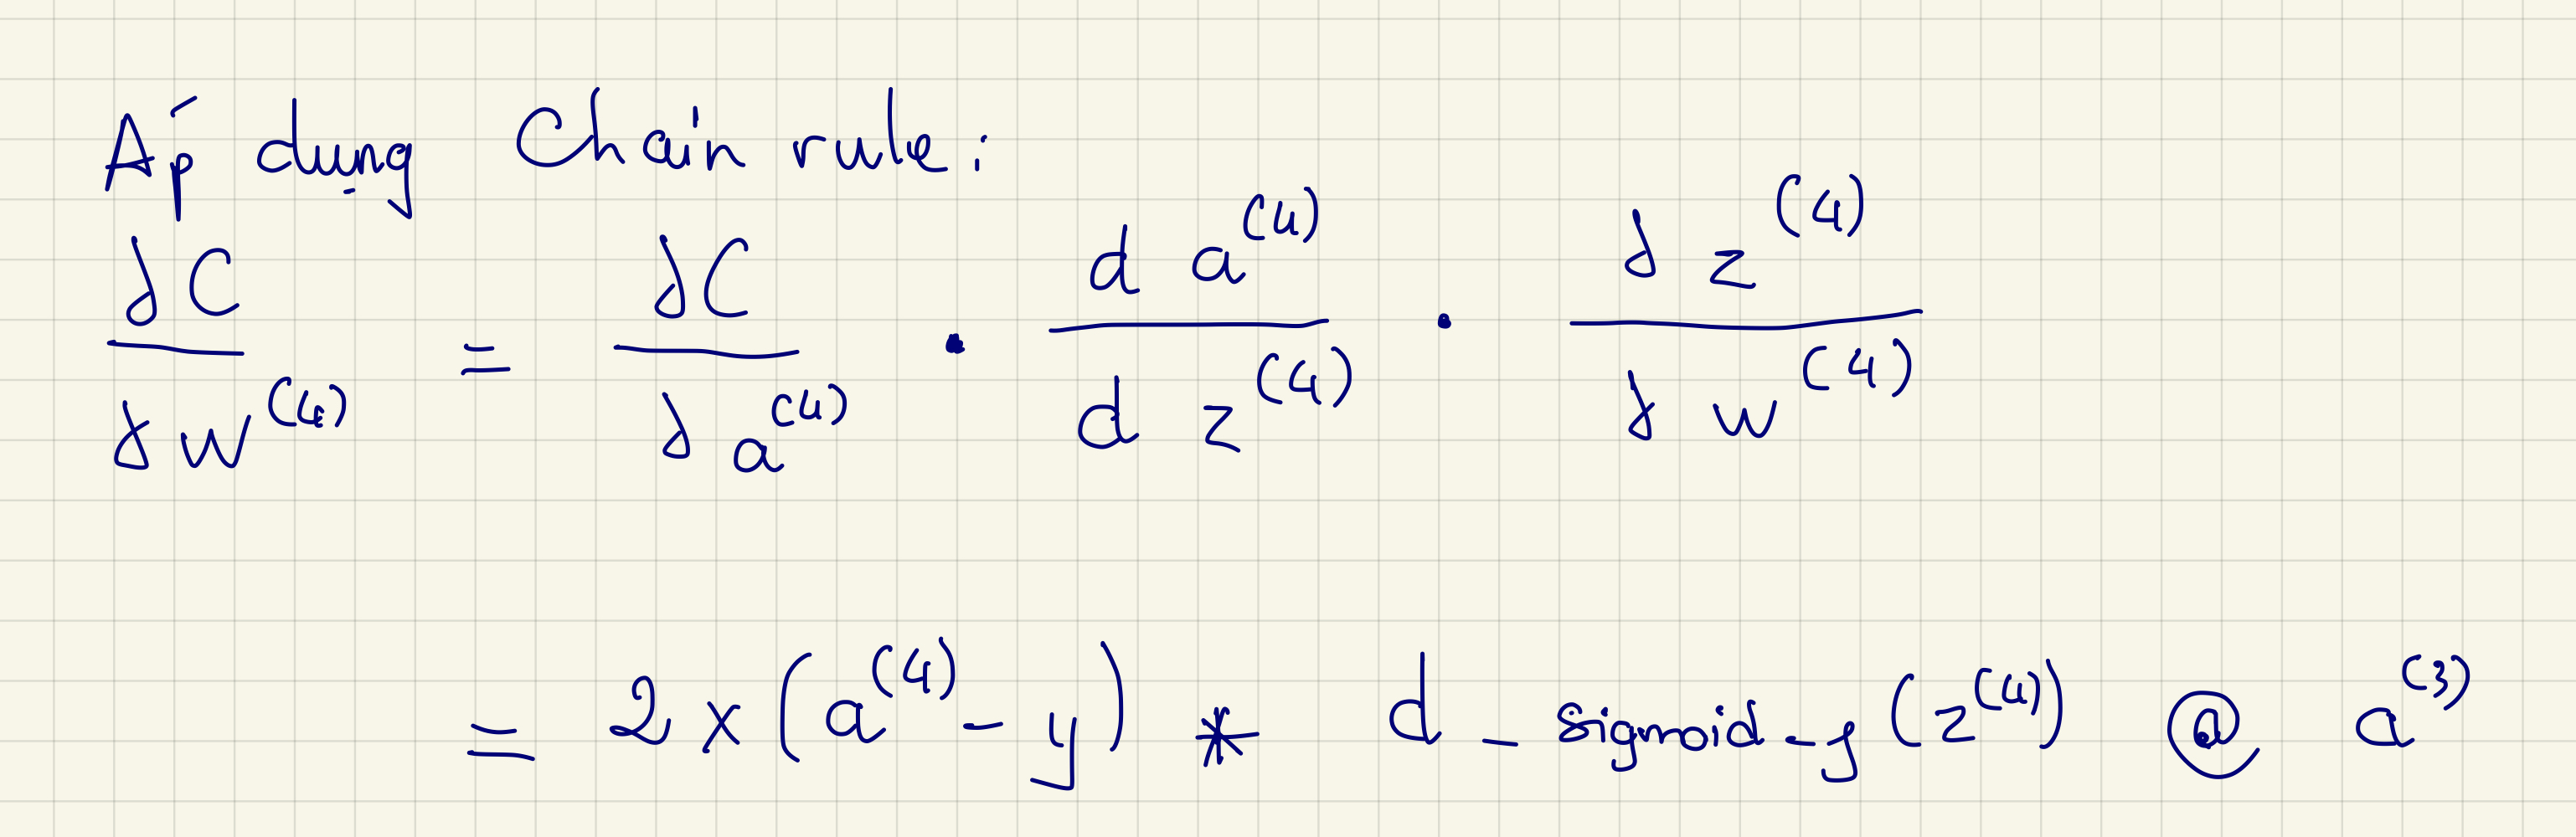

In [ ]:
#initial Jw4 with derivative of C with respect to a4
Jw4 = 2*(a4 - y)
Jw4

array([[-0.45244761,  1.43126641,  1.61037583]])

In [ ]:
#Multiply element wise current Jw4 with derivative of a4 with respect to z4
Jw4 = Jw4*d_sigmoid_f(z4)
Jw4

array([[-0.07919941,  0.29126604,  0.2526041 ]])

In [ ]:
#Do a matrix multiplication of current Jw4 with derivative z4 with respect to w4, which is a3.
Jw4 = np.dot(Jw4.T,a3).T
Jw4

array([[-0.00697394,  0.02564755,  0.02224315],
       [-0.03333697,  0.12260101,  0.10632725],
       [-0.08226556,  0.30254217,  0.26238347],
       [ 0.        ,  0.        ,  0.        ]])

In [ ]:
w4

array([[-0.15778475, -0.36896874,  0.50028863],
       [ 0.91577906,  0.37300186,  0.97772218],
       [ 0.06633057,  0.66925134,  0.49633131],
       [ 0.38375423, -0.96342345, -0.43911202]])

This time, we will compute the partial derivative of C with respect to w3

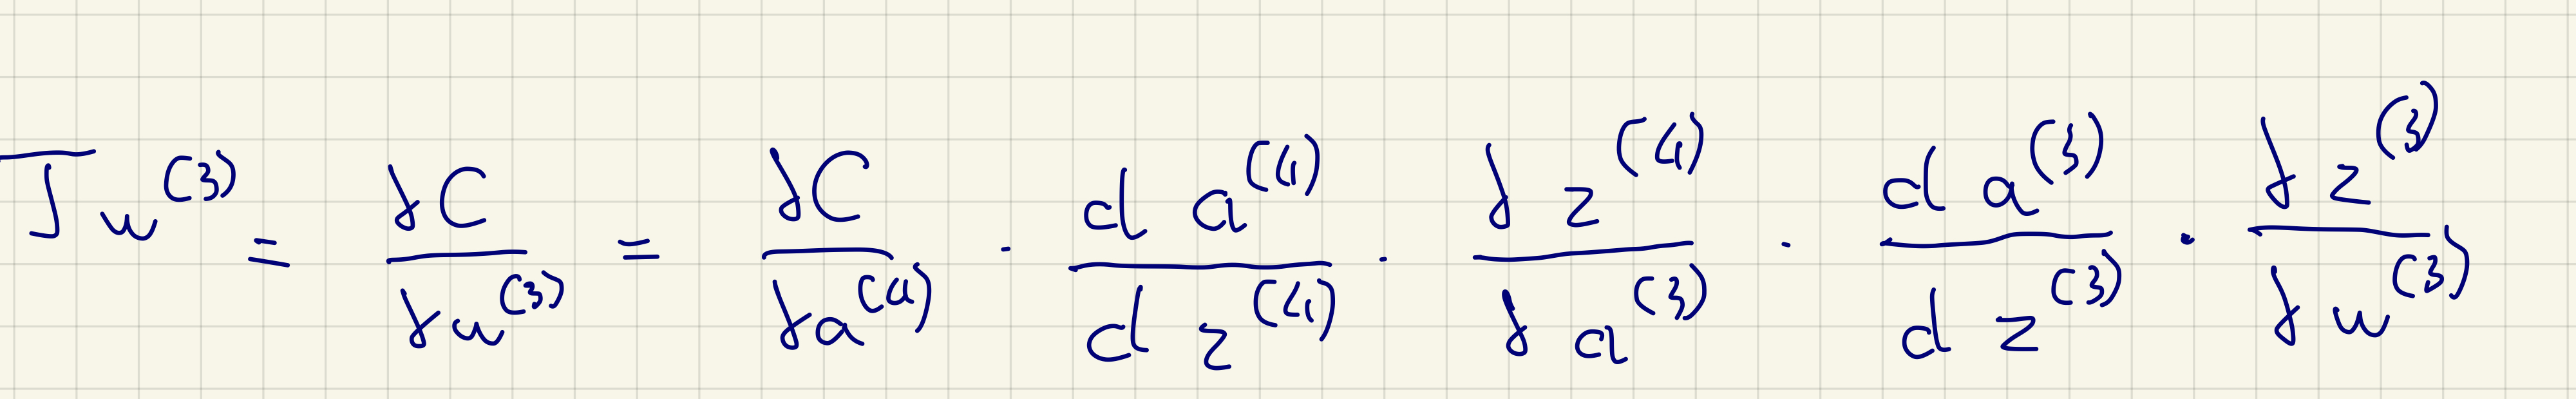

In [ ]:
#initial Jw3 with derivative of C with respect to a4
Jw3 = 2*(a4 - y)

#Multiply element wise current Jw3 with derivative of a4 with respect to z4
Jw3 = Jw3*d_sigmoid_f(z4)

#Do a matrix multiplication of current Jw3 with derivative z4 with respect to a3, which is w4.
Jw3 = (Jw3 @ w4.T)

#Do a matrix multiplication of current Jw3 with derivative a4 with respect to z3
Jw3 = Jw3*d_relu_f(z3)

#Do a matrix multiplication of current Jw3 with derivative z4 with respect to w4, which is a2.
Jw3 = np.dot(Jw3.T,a2).T


Jw3

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.01310946, 0.11817717, 0.13151981, 0.        ]])

In [ ]:
w3

array([[ 0.34093502, -0.71922612,  0.93652315,  0.7527783 ],
       [-0.1653904 , -0.60379702, -0.37315164,  0.78921333],
       [ 0.11737966,  0.60148914,  0.38464523, -0.82991158]])